In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
region_df = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/region.parquet")


In [11]:
region_df.head()

,time,bidding_area,num_windparks,air_temperature_2m,air_pressure_at_sea_level,relative_humidity_2m,precipitation_amount,wind_speed_10m,wind_direction_10m,ws10m_00,...,g10m_06,g10m_07,g10m_08,g10m_09,g10m_10,g10m_11,g10m_12,g10m_13,g10m_14,power_MW
0,2020-02-15 13:00:00,ELSPOT NO1,6,275.878937,100585.226562,0.864402,6.464181e-14,4.568511,210.913589,3.740687,...,8.757706,7.866786,8.302352,8.585355,9.148536,10.155828,8.838231,8.890331,6.511540,44.666173
1,2020-02-15 13:00:00,ELSPOT NO2,17,277.284180,99878.445312,0.772788,0.000000e+00,7.472271,155.678482,7.563542,...,17.378416,16.920948,17.212940,16.682010,16.727377,16.826397,16.863796,17.536335,15.773941,596.374888
2,2020-02-15 13:00:00,ELSPOT NO3,24,276.076935,99832.359375,0.891700,0.000000e+00,6.657547,233.088379,6.468776,...,12.194210,11.443217,10.773432,13.224432,15.573839,14.297405,12.121831,15.328096,10.223662,460.424020
3,2020-02-15 13:00:00,ELSPOT NO4,12,264.790710,99837.156250,0.869117,0.000000e+00,8.512906,154.787079,8.805918,...,10.275916,11.685341,9.079024,10.828403,10.477671,8.952191,11.565880,12.103825,11.366873,200.090927
4,2020-02-15 14:00:00,ELSPOT NO1,6,275.363647,100541.710938,0.870398,1.087279e-03,4.097149,206.835739,3.348926,...,8.624619,7.984353,8.264300,7.205638,9.052546,9.531441,8.367238,7.840395,7.153080,65.059451


In [22]:
region_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_windparks,7659656.0,17.647059,5.749079,6.000000,12.000000,17.000000,24.000000,24.000000
air_temperature_2m,7659656.0,278.694855,7.391598,240.365067,273.623955,278.563568,283.995804,306.619873
air_pressure_at_sea_level,7659656.0,101030.031250,1263.410889,94816.656250,100232.500000,101118.195312,101902.617188,105042.929688
relative_humidity_2m,7659656.0,0.819772,0.144379,0.165010,0.725746,0.845585,0.941716,1.000008
precipitation_amount,7659656.0,0.159684,0.528527,0.000000,0.000000,0.000019,0.036382,28.895412
...,...,...,...,...,...,...,...,...
g10m_11,7659656.0,9.176722,5.288262,0.314285,5.139139,8.171976,12.210695,50.815216
g10m_12,7659656.0,9.167675,5.277394,0.295192,5.136163,8.173783,12.201014,49.538437
g10m_13,7659656.0,9.188625,5.283971,0.271163,5.155497,8.202119,12.222174,51.097042
g10m_14,7659656.0,9.174571,5.282726,0.345495,5.135875,8.180244,12.215694,54.666286


In [23]:
region_df.isnull().sum()

time                           0
bidding_area                   0
num_windparks                  0
air_temperature_2m             0
air_pressure_at_sea_level      0
                            ... 
g10m_11                        0
g10m_12                        0
g10m_13                        0
g10m_14                        0
power_MW                     102
Length: 100, dtype: int64

In [24]:
region_df.shape

(7659656, 100)

In [25]:
region_df = region_df.dropna(subset=['power_MW'])

In [32]:
region_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_windparks,7659554.0,17.647111,5.749071,6.000000,12.000000,17.000000,24.000000,24.000000
air_temperature_2m,7659554.0,278.695160,7.391591,240.365067,273.624115,278.563660,283.995911,306.619873
air_pressure_at_sea_level,7659554.0,101030.054688,1263.405762,94816.656250,100232.523438,101118.214844,101902.625000,105042.929688
relative_humidity_2m,7659554.0,0.819773,0.144379,0.165010,0.725758,0.845585,0.941717,1.000008
precipitation_amount,7659554.0,0.159686,0.528530,0.000000,0.000000,0.000019,0.036385,28.895412
...,...,...,...,...,...,...,...,...
g10m_11,7659554.0,9.176761,5.288274,0.314285,5.139170,8.172023,12.210744,50.815216
g10m_12,7659554.0,9.167721,5.277404,0.295192,5.136195,8.173840,12.201072,49.538437
g10m_13,7659554.0,9.188660,5.283980,0.271163,5.155542,8.202148,12.222241,51.097042
g10m_14,7659554.0,9.174619,5.282737,0.345495,5.135914,8.180296,12.215768,54.666286


In [26]:
region_sample = region_df.sample(n=100000, random_state=42)
time_df = pd.to_datetime(region_sample.pop("time"), format='%d.%m.%Y %H:%M:%S')

In [27]:
scaler = StandardScaler()
features = region_sample.drop(columns=["power_MW"])
features = features.select_dtypes(include=["number"])
features_scaled = scaler.fit_transform(features)

target = region_sample["power_MW"].values
features_scaled.shape

(100000, 97)

In [28]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=region_sample.index)

region_sample_scaled = pd.concat([features_scaled_df, region_sample["power_MW"]], axis=1)
region_sample_scaled.head(6)

,num_windparks,air_temperature_2m,air_pressure_at_sea_level,relative_humidity_2m,precipitation_amount,wind_speed_10m,wind_direction_10m,ws10m_00,ws10m_01,ws10m_02,...,g10m_06,g10m_07,g10m_08,g10m_09,g10m_10,g10m_11,g10m_12,g10m_13,g10m_14,power_MW
7392732,-0.110988,-0.141620,1.422359,1.244252,-0.280665,-0.947732,0.361703,-0.744964,-0.808597,-1.127853,...,-0.698543,-0.812248,-0.987738,-0.797130,-0.645787,-0.923629,-0.787155,-0.973707,-0.620997,394.953922
710180,-2.024486,1.733768,1.067540,-2.616768,-0.300967,-1.052083,-1.694467,-0.985140,-1.137980,-0.977262,...,-0.700051,-0.490989,-0.217531,-0.743942,-0.747836,-0.739150,-0.879907,-0.776398,-0.595144,10.379533
1485774,1.106692,-1.581102,2.495269,-2.157992,-0.300967,-0.573137,-0.229551,-0.581509,-0.515865,-0.511824,...,-0.932039,-0.968942,-0.808290,-0.985897,-0.773141,-1.129075,-0.744651,-0.890912,-0.581116,839.324487
6827021,1.106692,1.605645,-0.482460,0.768359,-0.121815,-0.014193,-0.446438,0.352449,-1.412067,-0.739728,...,-0.877716,-0.655463,-0.414656,-0.604215,-0.365622,0.054910,-0.802132,-1.046046,-0.490095,578.925894
5019166,1.106692,1.182697,-0.320093,-0.779006,-0.300967,-0.175258,-1.607642,-0.663645,-0.532442,-0.842949,...,-0.815459,-0.673254,-0.856636,-0.665381,-0.804965,-0.953467,-0.756000,-0.680098,-0.451159,419.284072
6345291,-0.110988,1.359190,1.148636,-0.234923,-0.300967,-0.808502,-0.345116,-0.854650,-0.643469,-0.776840,...,-0.872304,-0.695558,-0.938484,-0.686122,-1.087060,-0.904314,-0.952743,-1.101474,-0.888899,20.786821


In [29]:
time_df = pd.to_datetime(region_df.pop("time"), format='%d.%m.%Y %H:%M:%S')
time_df.head()

0   2020-02-15 13:00:00
1   2020-02-15 13:00:00
2   2020-02-15 13:00:00
3   2020-02-15 13:00:00
4   2020-02-15 13:00:00
Name: time, dtype: datetime64[ns]

In [30]:
timestamp_s = time_df.map(pd.Timestamp.timestamp)
timestamp_s.head()

0    1.581772e+09
1    1.581772e+09
2    1.581772e+09
3    1.581772e+09
4    1.581772e+09
Name: time, dtype: float64

In [31]:
day = 24*60*60
year = (365.2425)*day

region_sample_scaled['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
region_sample_scaled['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
region_sample_scaled['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
region_sample_scaled.head(6)

,num_windparks,air_temperature_2m,air_pressure_at_sea_level,relative_humidity_2m,precipitation_amount,wind_speed_10m,wind_direction_10m,ws10m_00,ws10m_01,ws10m_02,...,g10m_10,g10m_11,g10m_12,g10m_13,g10m_14,power_MW,Day sin,Day cos,Year sin,Year cos
7392732,-0.110988,-0.141620,1.422359,1.244252,-0.280665,-0.947732,0.361703,-0.744964,-0.808597,-1.127853,...,-0.645787,-0.923629,-0.787155,-0.973707,-0.620997,394.953922,-0.965926,0.258819,0.312157,0.950030
710180,-2.024486,1.733768,1.067540,-2.616768,-0.300967,-1.052083,-1.694467,-0.985140,-1.137980,-0.977262,...,-0.747836,-0.739150,-0.879907,-0.776398,-0.595144,10.379533,-0.500000,-0.866025,-0.619500,-0.784997
1485774,1.106692,-1.581102,2.495269,-2.157992,-0.300967,-0.573137,-0.229551,-0.581509,-0.515865,-0.511824,...,-0.773141,-1.129075,-0.744651,-0.890912,-0.581116,839.324487,0.866025,-0.500000,0.673646,0.739054
6827021,1.106692,1.605645,-0.482460,0.768359,-0.121815,-0.014193,-0.446438,0.352449,-1.412067,-0.739728,...,-0.365622,0.054910,-0.802132,-1.046046,-0.490095,578.925894,-0.866025,0.500000,-0.927999,-0.372583
5019166,1.106692,1.182697,-0.320093,-0.779006,-0.300967,-0.175258,-1.607642,-0.663645,-0.532442,-0.842949,...,-0.804965,-0.953467,-0.756000,-0.680098,-0.451159,419.284072,-0.707107,0.707107,-0.058478,-0.998289
6345291,-0.110988,1.359190,1.148636,-0.234923,-0.300967,-0.808502,-0.345116,-0.854650,-0.643469,-0.776840,...,-1.087060,-0.904314,-0.952743,-1.101474,-0.888899,20.786821,-0.965926,0.258819,0.768212,-0.640195


In [72]:
region_df1 = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/scaled_features_power_MW_ELSPOT NO1.parquet")
region_df1.head(5)

,time,bidding_area,air_temperature_2m,air_pressure_at_sea_level,relative_humidity_2m,precipitation_amount,wind_speed_10m,wind_direction_10m,ws10m_00,ws10m_01,...,Year sin,Year cos,power_MW_lag1,power_MW_lag2,power_MW_lag3,power_MW_lag4,power_MW_lag5,power_MW_lag6,power_MW_lag7,power_MW
0,2020-02-15 20:00:00,ELSPOT NO1,-0.328893,-1.150512,1.052360,0.920296,2.108841,-0.429461,1.955979,1.910146,...,0.968972,0.990132,0.574271,0.527335,0.087042,-0.137068,-0.031825,-0.287411,-0.529846,0.588135
1,2020-02-15 21:00:00,ELSPOT NO1,-0.337997,-1.390815,1.081951,2.739937,2.699110,-0.452535,2.517708,1.639716,...,0.969685,0.989411,0.588251,0.574406,0.527461,0.087103,-0.137030,-0.031775,-0.287381,0.634974
2,2020-02-15 22:00:00,ELSPOT NO1,-0.346972,-1.588096,1.083042,3.503697,2.654731,-0.375993,2.562959,2.457066,...,0.970397,0.988689,0.635096,0.588388,0.574537,0.527565,0.087158,-0.136988,-0.031727,0.658720
3,2020-02-15 23:00:00,ELSPOT NO1,-0.328745,-1.801129,1.073904,3.297621,2.806569,-0.371587,2.575323,2.543024,...,0.971109,0.987967,0.658844,0.635238,0.588520,0.574646,0.527656,0.087217,-0.136947,0.651365
4,2020-02-16 00:00:00,ELSPOT NO1,-0.478774,-1.867458,1.106925,1.682687,3.256564,-0.354994,3.286711,2.391878,...,0.971820,0.987244,0.651489,0.658990,0.635376,0.588630,0.574741,0.527746,0.087274,0.607228


In [73]:
region_df1.shape

(44512, 110)

In [97]:
region_df2 = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/deep_learning/created_datasets/scaled_features_power_MW_ELSPOT NO1.parquet")
region_df2.head(5)

,time,bidding_area,wind_speed_10m,ws10m_00,ws10m_01,ws10m_02,ws10m_03,ws10m_04,ws10m_05,ws10m_06,...,g10m_13,g10m_14,power_MW_lag1,power_MW_lag2,power_MW_lag3,power_MW_lag4,power_MW_lag5,power_MW_lag6,power_MW_lag7,power_MW
0,2020-02-15 20:00:00,ELSPOT NO1,2.108841,1.955979,1.910146,1.892174,2.173323,1.907412,1.299109,1.724982,...,2.000181,1.590176,0.574271,0.527335,0.087042,-0.137068,-0.031825,-0.287411,-0.529846,0.588135
1,2020-02-15 21:00:00,ELSPOT NO1,2.699110,2.517708,1.639716,2.442514,2.038092,2.745219,1.763974,2.371530,...,2.055449,2.057542,0.588251,0.574406,0.527461,0.087103,-0.137030,-0.031775,-0.287381,0.634974
2,2020-02-15 22:00:00,ELSPOT NO1,2.654731,2.562959,2.457066,2.652036,2.906977,3.100225,2.122269,2.584600,...,2.315140,2.400588,0.635096,0.588388,0.574537,0.527565,0.087158,-0.136988,-0.031727,0.658720
3,2020-02-15 23:00:00,ELSPOT NO1,2.806569,2.575323,2.543024,2.833996,3.093764,2.974463,1.654307,2.056512,...,2.602241,2.484332,0.658844,0.635238,0.588520,0.574646,0.527656,0.087217,-0.136947,0.651365
4,2020-02-16 00:00:00,ELSPOT NO1,3.256564,3.286711,2.391878,2.321100,3.387800,3.035308,2.103793,2.340077,...,2.110157,2.153019,0.651489,0.658990,0.635376,0.588630,0.574741,0.527746,0.087274,0.607228


In [90]:
region_df2 = region_df2.drop(columns=["time", "bidding_area"], errors="ignore")

In [91]:
print(f"Total numeric features in dataset: {region_df2.select_dtypes(include=np.number).shape[1]}")

Total numeric features in dataset: 108


In [92]:
corr = region_df2.corr()
top_corr = corr["power_MW"].abs().sort_values(ascending=False).head(32)  # includes power_MW
top_features = top_corr.index.tolist()

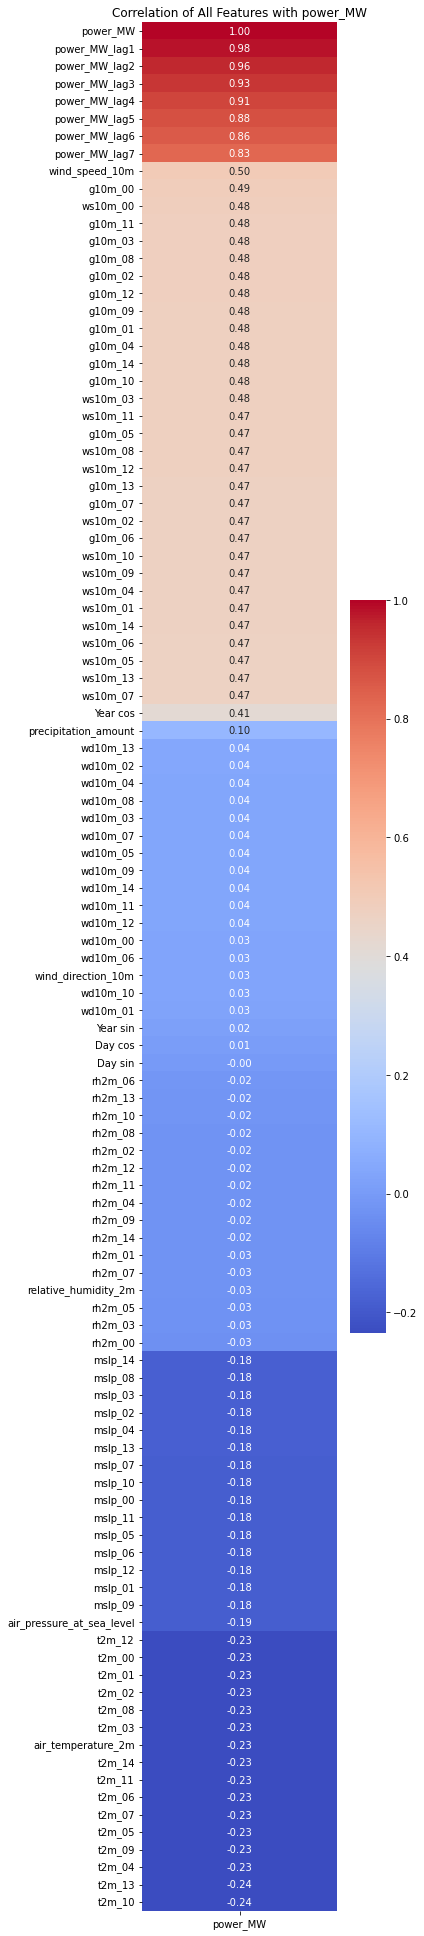

In [93]:
plt.figure(figsize=(6, len(region_df2.columns) * 0.25))  # auto-size by number of features
sns.heatmap(region_df2.corr()[["power_MW"]].sort_values(by="power_MW", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of All Features with power_MW")
plt.tight_layout()
plt.savefig("all_feature_correlations_with_power_MW.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
region_df2.shape

(44534, 103)

In [15]:
region_df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_windparks,44534.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
air_temperature_2m,44534.0,2.409853e-15,1.000011,-3.985346,-0.700771,-0.043702,0.727243,3.247767
air_pressure_at_sea_level,44534.0,-3.267597e-16,1.000011,-4.576673,-0.633486,0.066021,0.695450,3.106812
relative_humidity_2m,44534.0,7.658430e-17,1.000011,-4.416433,-0.651042,0.234677,0.850181,1.157228
precipitation_amount,44534.0,4.084496e-17,1.000011,-0.290738,-0.290738,-0.290720,-0.247911,45.847800
...,...,...,...,...,...,...,...,...
Day sin,44534.0,-2.209776e-17,1.000011,-1.413019,-0.998719,0.001490,1.001699,1.415999
Day cos,44534.0,-4.080507e-17,1.000011,-1.413757,-0.999629,0.000163,0.999955,1.414082
Year sin,44534.0,-4.595058e-17,1.000011,-1.435489,-1.000376,0.022855,1.011901,1.380665
Year cos,44534.0,-2.042248e-17,1.000011,-1.435547,-1.005778,0.036542,0.978726,1.406697
